In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

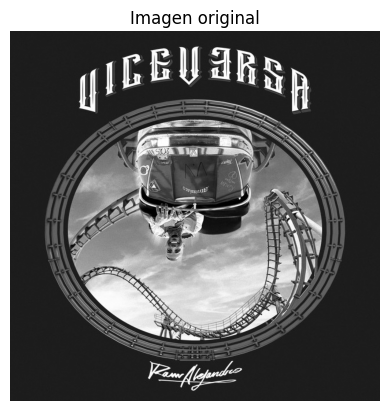

In [ ]:
# Cargar una imagen en escala de grises
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen original
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.axis('off')
plt.show()

In [ ]:
def convolve2d(image, kernel):
    h, w = kernel.shape
    pad_h, pad_w = h // 2, w // 2

    # Padding de la imagen
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+h, j:j+w]
            output[i, j] = np.clip(np.sum(region * kernel), 0, 255)

    return output.astype(np.uint8)

In [ ]:
# Kernel de enfoque (sharpen)
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Kernel de suavizado (blur)
blur_kernel = np.ones((3, 3), dtype=np.float32) / 9.0

# Kernel de detección de bordes (Sobel x + y)
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0,  0,  0],
                    [1,  2,  1]])

In [ ]:
# Aplicar convolución manual
sharpen_manual = convolve2d(img, sharpen_kernel)
blur_manual = convolve2d(img, blur_kernel)
Ix = convolve2d(img, sobel_x).astype(np.float32)
Iy = convolve2d(img, sobel_y).astype(np.float32)

# Detección de esquinas: derivadas cruzadas Ix*Iy
Ixy = Ix * Iy
# Normalización para visualización
corner_response = np.abs(Ixy)
corner_response = np.clip(corner_response / corner_response.max() * 255, 0, 255).astype(np.uint8)

# También calculamos las versiones con OpenCV para comparar
sharpen_cv = cv2.filter2D(img, -1, sharpen_kernel)
blur_cv = cv2.filter2D(img, -1, blur_kernel)
Ix_cv = cv2.filter2D(img.astype(np.float32), cv2.CV_32F, sobel_x)
Iy_cv = cv2.filter2D(img.astype(np.float32), cv2.CV_32F, sobel_y)
Ixy_cv = Ix_cv * Iy_cv
corner_cv = np.clip(np.abs(Ixy_cv) / np.max(np.abs(Ixy_cv)) * 255, 0, 255).astype(np.uint8)

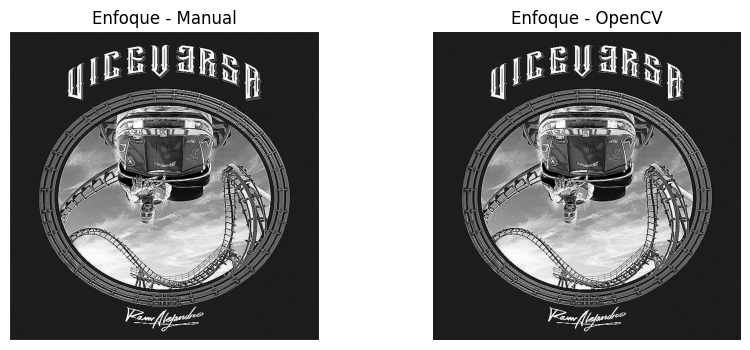

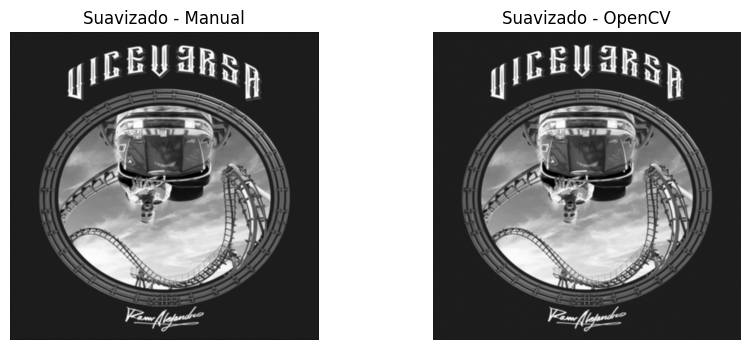

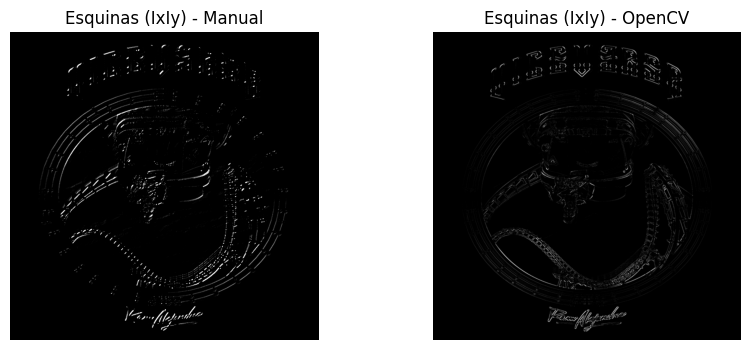

In [ ]:
# Mostrar comparaciones
def mostrar_comparaciones(titulo, manual, opencv):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(manual, cmap='gray')
    plt.title(f'{titulo} - Manual')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(opencv, cmap='gray')
    plt.title(f'{titulo} - OpenCV')
    plt.axis('off')
    plt.show()

mostrar_comparaciones("Enfoque", sharpen_manual, sharpen_cv)
mostrar_comparaciones("Suavizado", blur_manual, blur_cv)
mostrar_comparaciones("Esquinas (IxIy)", corner_response, corner_cv)